<a href="https://colab.research.google.com/github/khalidsadi/image-processing/blob/main/Khalid_Sadi_41210201584_Lab_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary library import

In [ ]:
#Import Necessary Libary That You Require
#Write here
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt



# Task 1 - Basic Image Operation

import your image or any photo taken by you or from internet (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [ ]:
I = io.imread("ks1.jfif")
print(I.shape)



(400, 300, 3)


(-0.5, 299.5, 399.5, -0.5)

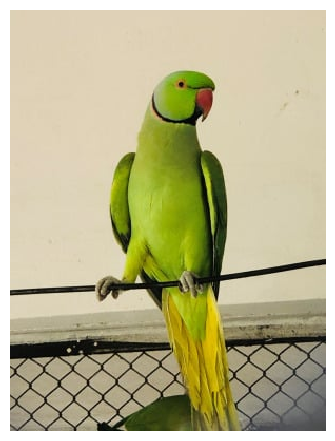

In [ ]:
io.imshow(I)
plt.axis("off")

In [ ]:
hist, bins_hist = exposure.histogram(I.ravel(), nbins=256, normalize=True) #pdf
cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)# cdf

In [ ]:
I.ravel()

array([220, 209, 181, ...,  72,  74,  73], dtype=uint8)

In [ ]:
cdf

array([0.008725  , 0.01085278, 0.01309167, 0.01535556, 0.01771389,
       0.020225  , 0.022825  , 0.02553333, 0.02826389, 0.03089444,
       0.03393611, 0.03686111, 0.04053889, 0.0441    , 0.04741111,
       0.05101944, 0.05453056, 0.05767778, 0.06064444, 0.06339444,
       0.06592778, 0.06823611, 0.07035833, 0.07226667, 0.07427222,
       0.07611111, 0.07795833, 0.07978333, 0.08166111, 0.08348889,
       0.08518611, 0.08678889, 0.08836944, 0.08981667, 0.09124444,
       0.09267222, 0.09404444, 0.09536389, 0.09661389, 0.097825  ,
       0.09916667, 0.10048611, 0.10189444, 0.10324722, 0.10451944,
       0.10587222, 0.10727778, 0.10863333, 0.11001111, 0.11136111,
       0.11286944, 0.11433056, 0.11576667, 0.11703333, 0.1183    ,
       0.11956389, 0.12081389, 0.12209722, 0.12331111, 0.12453889,
       0.12579167, 0.12701111, 0.12821944, 0.12952778, 0.13090556,
       0.13217222, 0.13354444, 0.13498611, 0.13633333, 0.13761111,
       0.13876667, 0.13990833, 0.14115278, 0.14246389, 0.14378

In [ ]:
bins_hist

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
hist.shape

(246,)

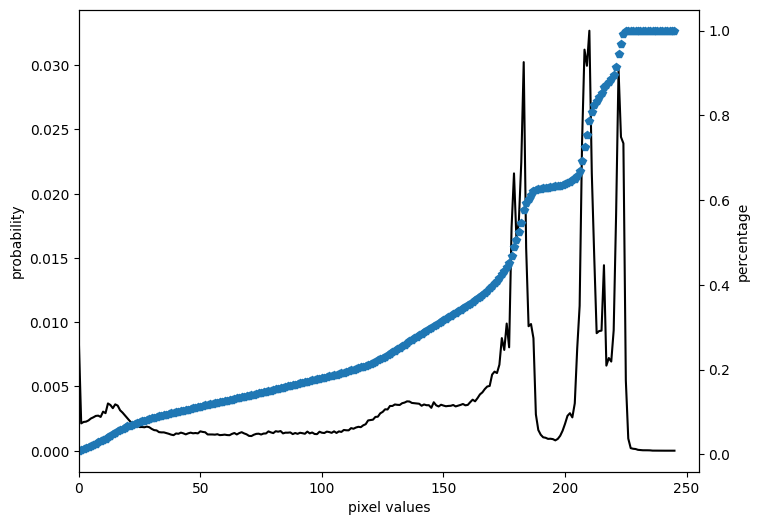

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("pixel values")
plt.ylabel("probability")
plt.xlim([0, 255])


plt.twinx()
plt.plot(bins_cdf, cdf, 'p', lw=6)
plt.ylabel("percentage")
plt.show()

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")


In [ ]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

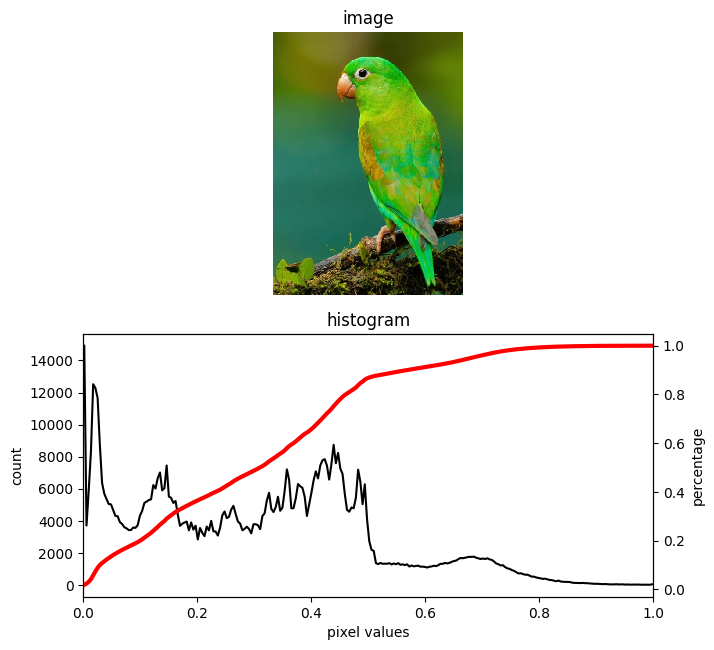

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()





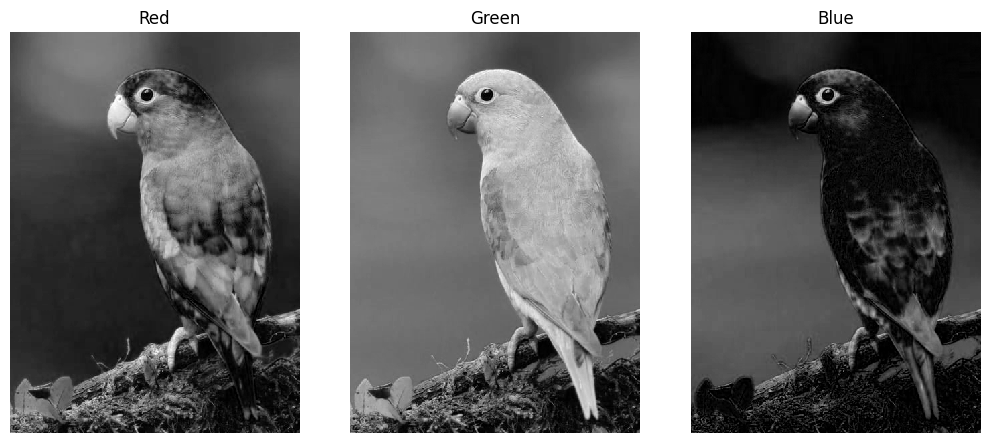

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(3):
    plt.subplot(1, 3, i+1)
    io.imshow(I[:, :, i])
    plt.title(['Red', 'Green', 'Blue'][i])
    plt.axis("off")


In [ ]:
I = io.imread("ks2.jfif")
print(I.shape)

(3264, 4896, 3)


(-0.5, 4895.5, 3263.5, -0.5)

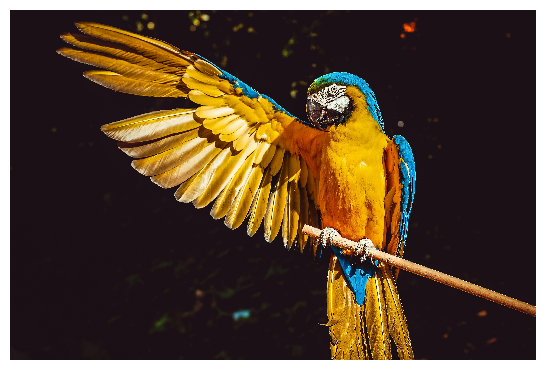

In [ ]:
io.imshow(I)
plt.axis("off")

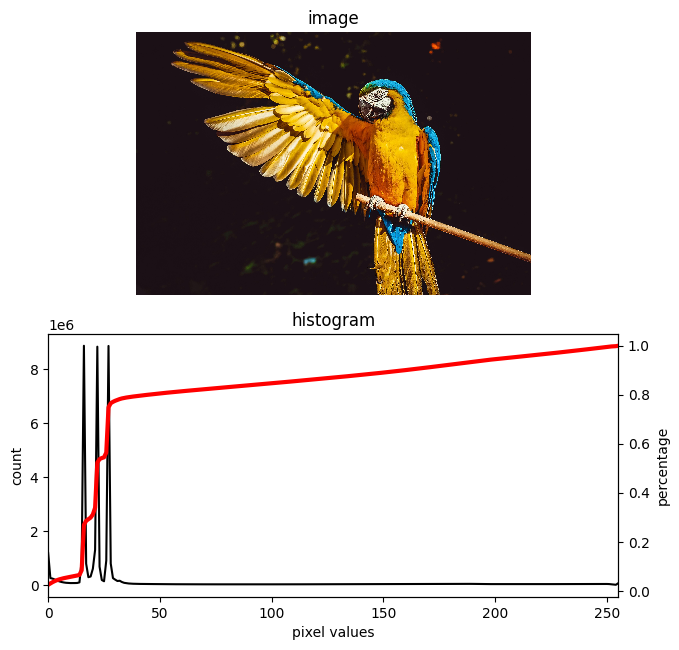

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()

Text(0.5, 1.0, 'Blue')

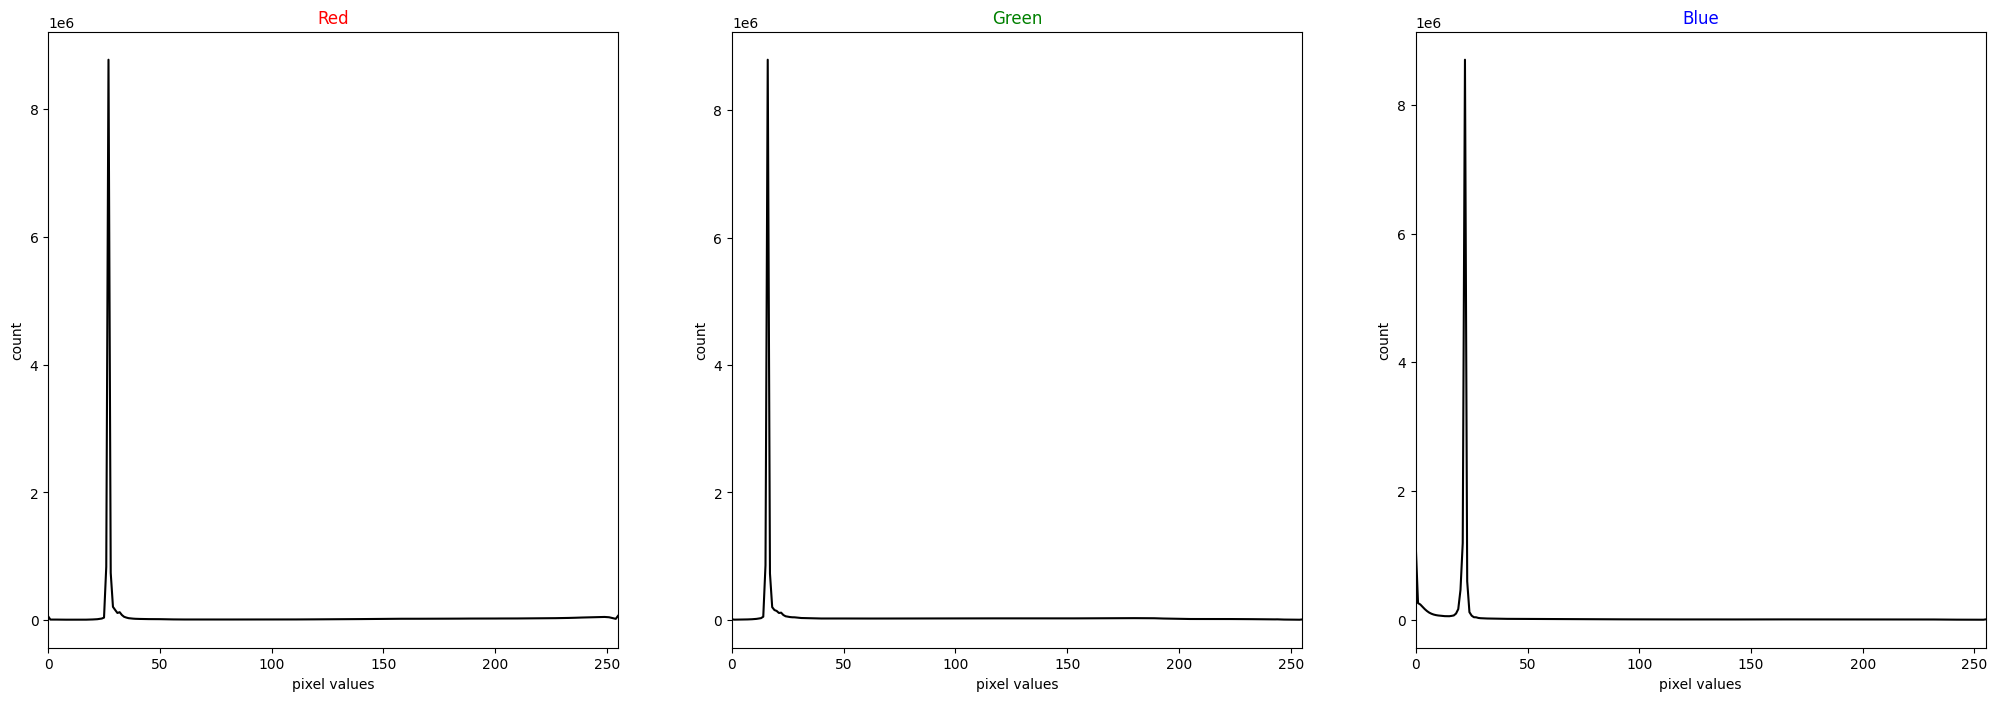

In [ ]:
plt.rcParams['figure.figsize'] = (25, 8)
plt.subplot(1, 3, 1)
plot_hist(I[:, :, 0], plot_cdf=False)
plt.title("Red", color="red")

plt.subplot(1, 3, 2)
plot_hist(I[:, :, 1], plot_cdf=False)
plt.title("Green", color="green")

plt.subplot(1, 3, 3)
plot_hist(I[:, :, 2], plot_cdf=False)
plt.title("Blue", color="blue")

In [ ]:
I = io.imread("ks3.jfif")
I = I/255
print(I.shape)

(600, 433, 3)


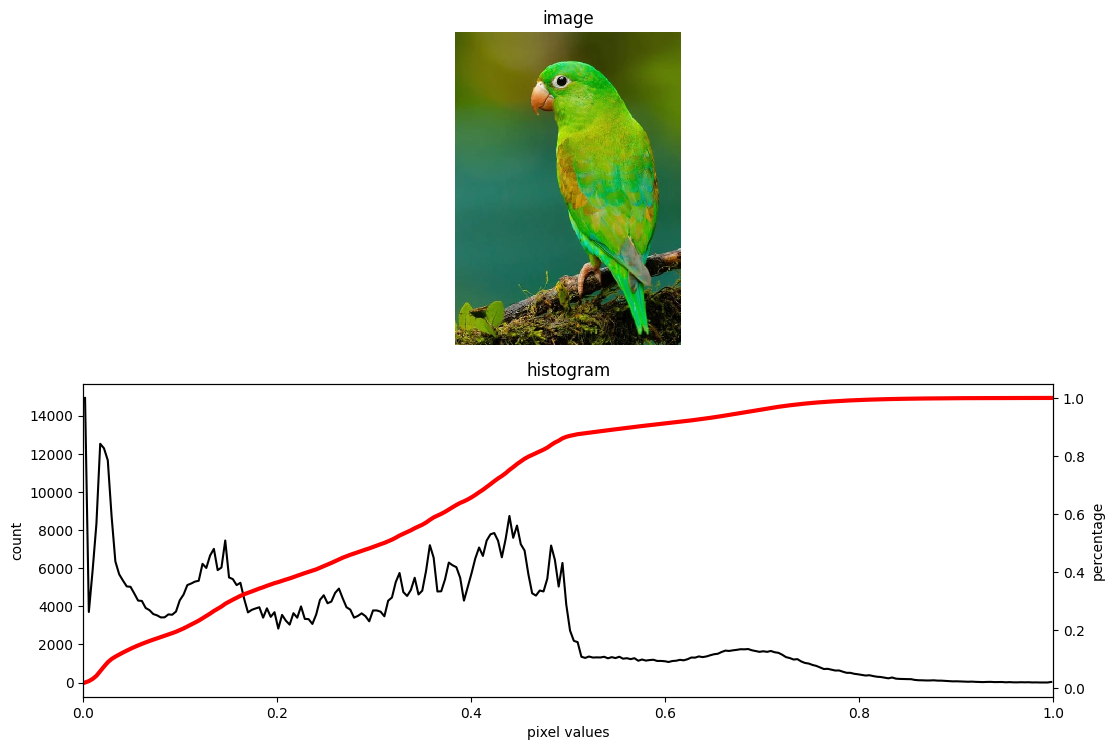

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
plot_img_and_hist(I)

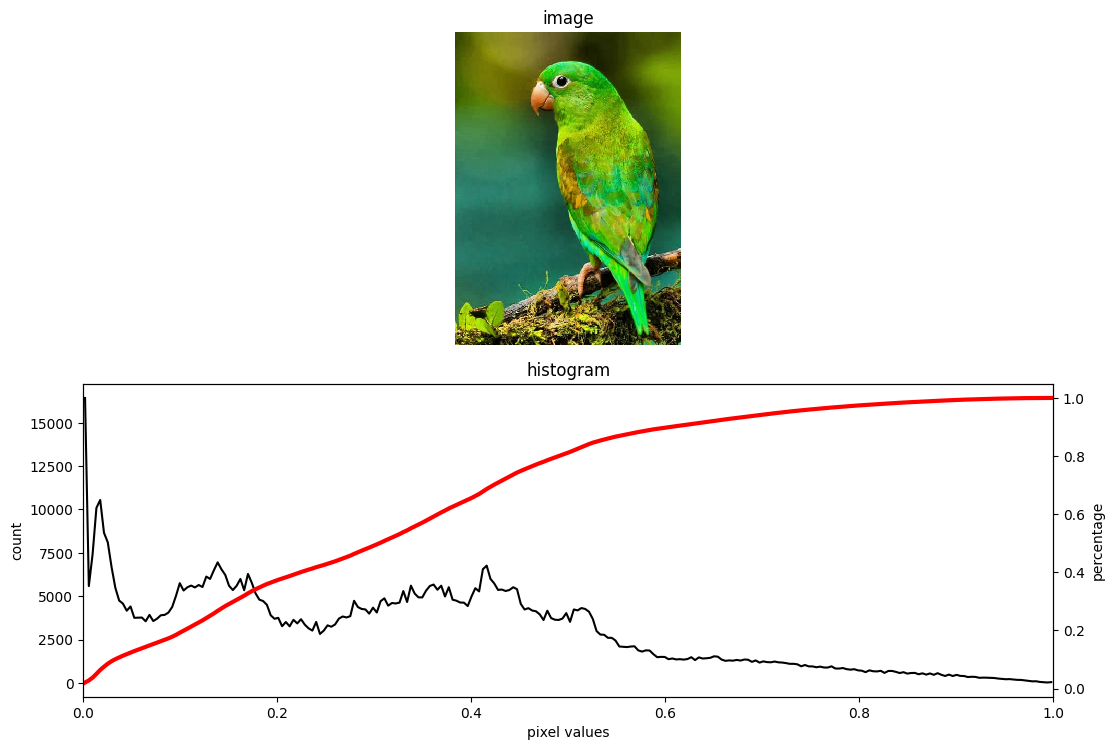

In [ ]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)

In [ ]:
I = io.imread("ks3.jfif")
I = I/255

In [ ]:
Ilab = color.rgb2lab(I)

In [ ]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

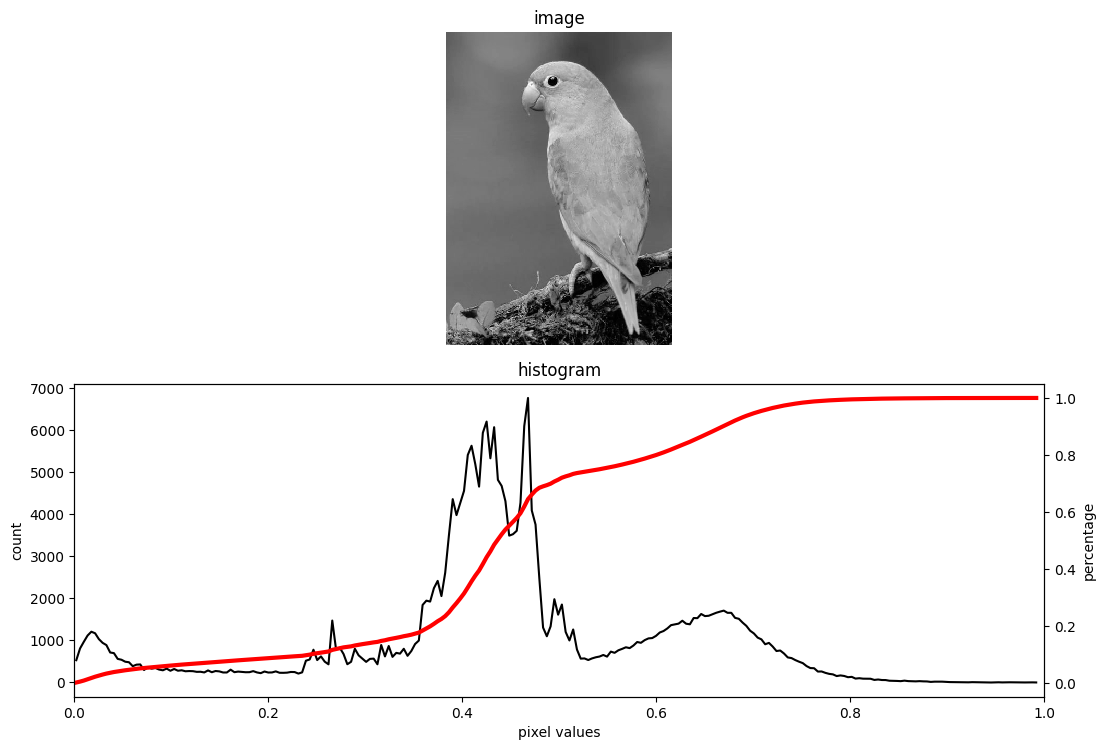

In [ ]:
plot_img_and_hist(Ilab[:, :, 0])

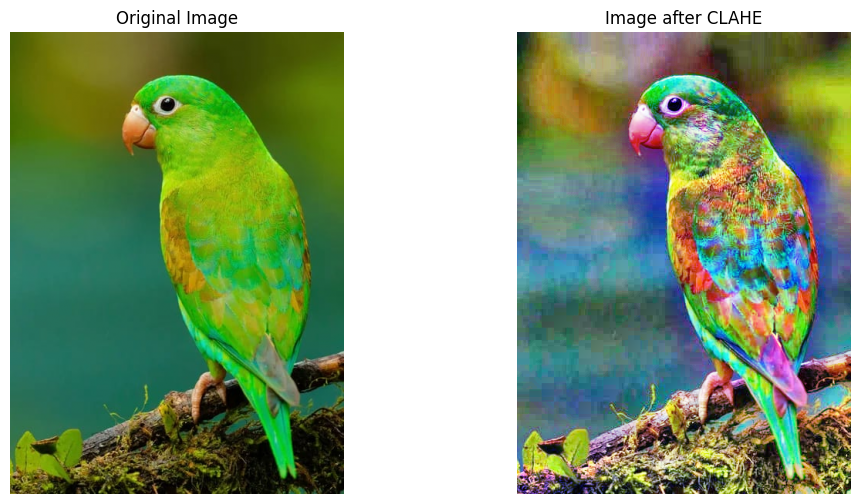

In [ ]:
# Split the image into RGB channels
R, G, B = I[:, :, 0], I[:, :, 1], I[:, :, 2]

# Create a CLAHE object
clahe = exposure.equalize_adapthist

# Apply CLAHE to each channel
R_clahe = clahe(R, clip_limit=0.03, nbins=256)
G_clahe = clahe(G, clip_limit=0.03, nbins=256)
B_clahe = clahe(B, clip_limit=0.03, nbins=256)

# Merge the channels back
I_clahe = np.stack((R_clahe, G_clahe, B_clahe), axis=-1)

# Display the original and CLAHE images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(I)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Image after CLAHE")
plt.imshow(I_clahe)
plt.axis('off')

plt.show()

In [ ]:
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.4, 0.6))

In [ ]:
Ilab[:, :, 0] = Idegraded_l*50

In [ ]:
Idegraded = color.lab2rgb(Ilab)

<ipython-input-101-e50d55ce7566>:1: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 149 negative Z values that have been clipped to zero
  Idegraded = color.lab2rgb(Ilab)


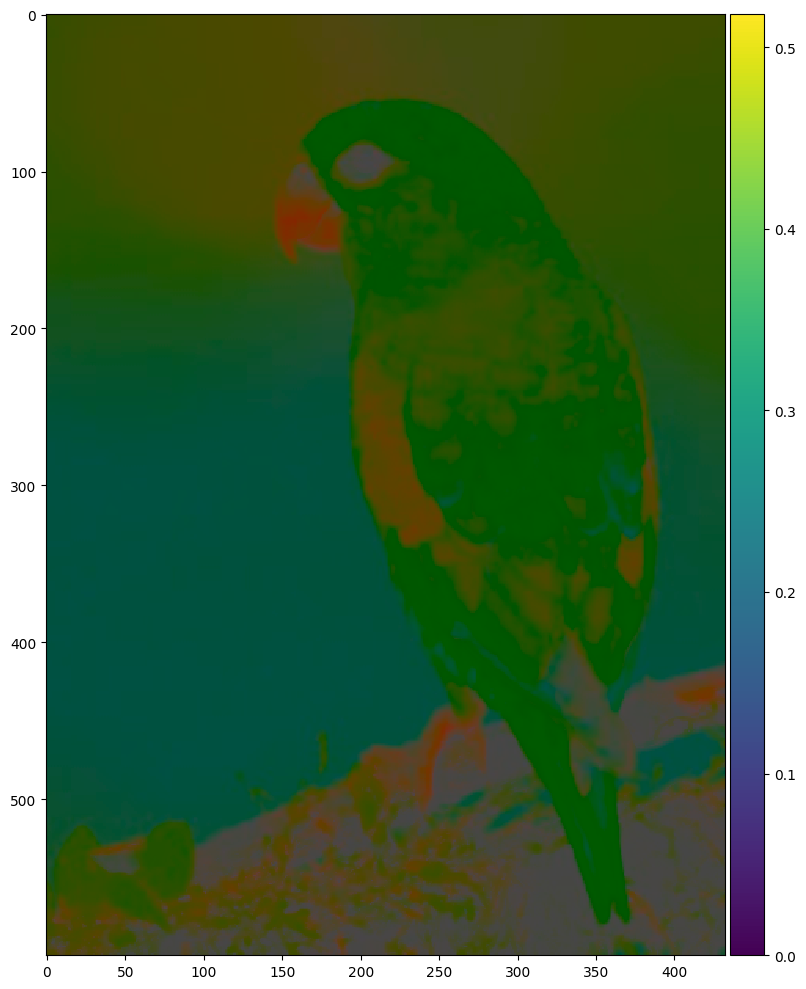

In [ ]:
io.imshow(Idegraded)